## 課程目標

利用 Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響

## 範例重點
    
模型架構的層數
    
使用何種的 Loss Function

## 資料準備

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
np.random.seed(10)
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
def normalize_cifar10_data(x, y):
    x = x.astype('float32') / 255
    y = np_utils.to_categorical(y)
    return x, y

def normalize_result(x, y):
    print('x_image.shape:', x.shape)
    print('y_label.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(x_img_train, y_label_train)

Before normalization:
x_image.shape: (50000, 32, 32, 3)
y_label.shape: (50000, 1)


In [5]:
print('After normalization:')
x_img_train, y_label_train = normalize_cifar10_data(x_img_train, y_label_train)
x_img_test, y_label_test = normalize_cifar10_data(x_img_test, y_label_test)
normalize_result(x_img_train, y_label_train)

After normalization:
x_image.shape: (50000, 32, 32, 3)
y_label.shape: (50000, 10)


## 建立模型

In [6]:
# 宣告採用序列模型
model = Sequential()

# 卷積層1與池化層1
model.add(Conv2D(filters=32, kernel_size=(3, 3,), input_shape=(32, 32, 3,), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2,)))

# 卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3,), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2,)))

# 卷積層3與池化層3
model.add(Conv2D(filters=128, kernel_size=(3, 3,), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2,)))

# 卷積層4與池化層4
model.add(Conv2D(filters=256, kernel_size=(3, 3,), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2,)))

# 平坦層
model.add(Flatten())

# 全網路連接層
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

# 輸出層
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         295168    
__________

## 載入之前訓練的模型

In [8]:
try:
    model.load_weights('data/part07/day_071_cifar10_weights.h5')
    print('載入參數成功! 繼續訓練模型...')
except:
    print('載入參數失敗! 開始訓練一個新模型...')

載入參數失敗! 開始訓練一個新模型...


In [9]:
def show_train_history(train_history, train_hst_name, val_hst_name):
    plt.plot(train_history.history[train_hst_name])
    plt.plot(train_history.history[val_hst_name])
    plt.xlabel('Epoch')
    plt.ylabel(train_hst_name)
    plt.title('Train History')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## 訓練模型

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(x=x_img_train, y=y_label_train, validation_split=0.25, epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 94s 3ms/step - loss: 1.6097 - acc: 0.4023 - val_loss: 1.2925 - val_acc: 0.5246
Epoch 2/12
37500/37500 [==============================] - 93s 2ms/step - loss: 1.1524 - acc: 0.5823 - val_loss: 1.0169 - val_acc: 0.6454
Epoch 3/12
37500/37500 [==============================] - 93s 2ms/step - loss: 0.9356 - acc: 0.6639 - val_loss: 0.9172 - val_acc: 0.6801
Epoch 4/12
37500/37500 [==============================] - 93s 2ms/step - loss: 0.7731 - acc: 0.7273 - val_loss: 0.8311 - val_acc: 0.7157
Epoch 5/12
37500/37500 [==============================] - 92s 2ms/step - loss: 0.6488 - acc: 0.7695 - val_loss: 0.8292 - val_acc: 0.7152
Epoch 6/12
37500/37500 [==============================] - 92s 2ms/step - loss: 0.5378 - acc: 0.8119 - val_loss: 0.8059 - val_acc: 0.7262
Epoch 7/12
37500/37500 [==============================] - 92s 2ms/step - loss: 0.4358 - acc: 0.8459 - val_loss: 0.8349 - val_acc

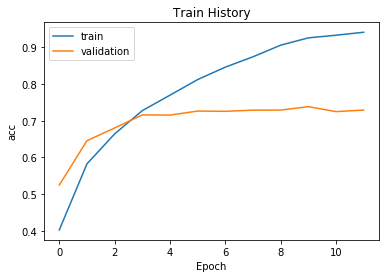

In [11]:
show_train_history(train_history, 'acc', 'val_acc')

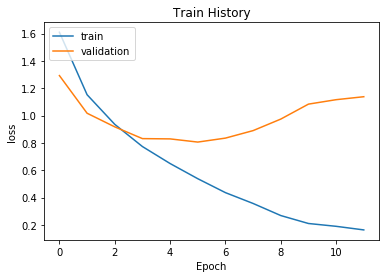

In [12]:
show_train_history(train_history, 'loss', 'val_loss')